In [136]:
import pandas as pd
from sklearn import linear_model
import numpy as np
import re

# Migration

In [137]:
# migr = immigration
migr_suffix = 'COMPLET,TOTAL,NR,T,'
gdp_suffix = 'CLV10_EUR_HAB,B1GQ,'
unempl_suffix = 'TOTAL,PC_ACT,T,'

dict_countries = {
    'AL': 'Albania',#
    'AT': 'Austria',
    'BA': 'Bosnia and Herzegovina',#
    'BE': 'Belgium',
    'BG': 'Bulgaria',
    'CH': 'Switzerland',
    'CY': 'Cyprus',
    'CZ': 'Czechia',
    'DE': 'Germany',
    'DK': 'Denmark',
    'EE': 'Estonia',
    'EL': 'Greece',
    'ES': 'Spain',
    'FI': 'Finland',
    'FR': 'France',
    'HR': 'Croatia',
    'HU': 'Hungary',
    'IE': 'Ireland',
    'IS': 'Iceland',
    'IT': 'Italy',
    'LI': 'Liechtenstein',
    'LT': 'Lithuania',
    'LU': 'Luxembourg',
    'LV': 'Latvia',
    'ME': 'Montenegro',
    'MK': 'North Macedonia',#
    'MT': 'Malta',
    'NL': 'Netherlands',
    'NO': 'Norway',
    'PL': 'Poland',
    'PT': 'Portugal',
    'RO': 'Romania',
    'RS': 'Serbia',#
    'SE': 'Sweden',
    'SI': 'Slovenia',
    'SK': 'Slovakia',
    'TR': 'Turkey',
    'UK': 'United Kingdom'
}

def translate_countries(shortcut):
    shortcut_cut = shortcut.replace(suffix, '')
    return dict_countries[shortcut_cut]

In [138]:
deleted_countries = [
    'Albania',
    'Bosnia and Herzegovina',
    'Bulgaria',
    'Belgium',
    'Iceland',
    'Liechtenstein',
    'North Macedonia',
    'Montenegro',
    'Romania',
    'Serbia', # there is no such country in unemployment data
    'Switzerland', # there is no such country in unemployment data
    'Turkey'
]

In [139]:
def delete_countries(array, deleted_countries):
    for d in deleted_countries:
        array = array[~array['Country'].str.endswith(d)]
    return array

In [140]:
migr = pd.read_csv('immigration.tsv', sep='\t')

In [141]:
migr.head()

,"agedef,age,unit,sex,geo\time",2017,2016,2015,2014,2013,2012,2011,2010,2009,...,1999,1998,1997,1996,1995,1994,1993,1992,1991,1990
0,"COMPLET,TOTAL,NR,F,AT",52863,59191,69345,52494,47432,42524,38007,33863,33019,...,41346,33793,32392,32883,:,:,:,:,:,:
1,"COMPLET,TOTAL,NR,F,BE",58613,57056,63217,57681,57203,60747,68912 b,64372 b,:,...,41928,38156,29363,30882,31610,32834,30297,31583,31406,29563
2,"COMPLET,TOTAL,NR,F,BG",13126 p,10300,11730,11903 p,8074 p,5921 bp,:,:,:,...,:,:,:,:,:,:,:,:,:,:
3,"COMPLET,TOTAL,NR,F,CH",68334,71356,73714,75173,76841,70586,70755 b,76513,76124,...,53754,47858,46220,48649,58066,64892,71620,75641,77819,72508
4,"COMPLET,TOTAL,NR,F,CY",11316,8829,8688,6448,6675,11681,12707,11494,13026 b,...,:,:,:,:,:,:,:,:,:,:


In [142]:
migr.rename(columns={'agedef,age,unit,sex,geo\\time':'Country'}, inplace=True)

In [143]:
suffix = migr_suffix
migr = migr[migr.Country.str.startswith(suffix)]
migr.head()

,Country,2017,2016,2015,2014,2013,2012,2011,2010,2009,...,1999,1998,1997,1996,1995,1994,1993,1992,1991,1990
64,"COMPLET,TOTAL,NR,T,AT",111801,129509,166323,116262,101866,91557,82230,70978,69295,...,86710,72723,70122,69930,:,:,:,:,:,:
65,"COMPLET,TOTAL,NR,T,BE",126703,123702,146626,123158,120078,129477,147377 b,135281 b,:,...,91624,83812,58849,61522,62950,66147,63749,66763,67460,62662
66,"COMPLET,TOTAL,NR,T,BG",25597 p,21241,25223 p,26615 p,18570 p,14103 bp,:,:,:,...,:,:,:,:,:,:,:,:,:,:
67,"COMPLET,TOTAL,NR,T,CH",143377,149305,153627,156282,160157,149051,148799 b,161778,160623,...,107953,95955,91687,97591,113967,130188,144537,157190,164773,154244
68,"COMPLET,TOTAL,NR,T,CY",21306,17391,15183,9212,13149,17476,23037,20206,22581 b,...,8524,8801,:,:,:,:,:,:,:,:


In [144]:
migr['Country'] = migr['Country'].apply(translate_countries)

In [145]:
migr.sort_values('Country', inplace=True)

In [146]:
cols = list(migr.columns)
cols = [col.replace(' ', '') for col in cols]
migr.columns = cols

In [147]:
def remove_letters(item):
    if re.sub('\D', '', item) != '':
        return re.sub('\D', '', item)
    else:
        return ''
    
def cast_to_int(item):
    if item == '':
        return np.NaN
    else:
        return int(item)

for col in cols:
    if col != 'Country':
        migr[col] = migr[col].apply(remove_letters)
        migr[col] = migr[col].apply(cast_to_int)

In [148]:
migr = delete_countries(migr, deleted_countries)

In [149]:
migr = migr.reset_index(drop=True)
migr

,Country,2017,2016,2015,2014,2013,2012,2011,2010,2009,...,1999,1998,1997,1996,1995,1994,1993,1992,1991,1990
0,Austria,111801,129509,166323,116262,101866,91557,82230.0,70978.0,69295.0,...,86710.0,72723.0,70122.0,69930.0,NaN,NaN,NaN,NaN,NaN,NaN
1,Croatia,15553,13985,11706,10638,10378,8959,8534.0,8846.0,13213.0,...,32910.0,51784.0,52343.0,44596.0,42026.0,33426.0,57702.0,48324.0,10050.0,NaN
2,Cyprus,21306,17391,15183,9212,13149,17476,23037.0,20206.0,22581.0,...,8524.0,8801.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Czechia,51847,64083,29602,29897,30124,34337,27114.0,48317.0,75620.0,...,NaN,NaN,12880.0,10857.0,10540.0,NaN,NaN,NaN,NaN,NaN
4,Denmark,68579,74383,78492,68388,60312,54409,52833.0,52236.0,51800.0,...,50236.0,51372.0,50105.0,54445.0,63187.0,44961.0,43400.0,43377.0,43567.0,40715.0
5,Estonia,17616,14822,15413,3904,4109,2639,3709.0,2810.0,3884.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Finland,31797,34905,28746,31507,31941,31278,29481.0,25636.0,26699.0,...,14744.0,14192.0,13564.0,13294.0,12222.0,11611.0,14795.0,14554.0,19001.0,13558.0
7,France,369964,378115,364221,340383,338752,327431,319816.0,307111.0,296970.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Germany,917109,1029852,1543848,884893,692713,592175,489422.0,404055.0,346216.0,...,874023.0,802456.0,840633.0,959691.0,1096048.0,1082553.0,1277408.0,1502198.0,1198978.0,1256250.0
9,Greece,112247,116867,64446,59013,57946,58200,60089.0,60462.0,58613.0,...,84695.0,116411.0,113477.0,95585.0,98989.0,86959.0,107462.0,110334.0,151978.0,NaN


In [150]:
migr.loc[:, '2018':'2000']

,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006,2005,2004,2003,2002,2001,2000
0,111801,129509,166323,116262,101866,91557,82230.0,70978.0,69295.0,73772.0,72862.0,98535.0,114465.0,122547.0,111869.0,108125.0,89928.0,81676.0
1,15553,13985,11706,10638,10378,8959,8534.0,8846.0,13213.0,16883.0,14622.0,14978.0,NaN,18383.0,18455.0,20365.0,24415.0,NaN
2,21306,17391,15183,9212,13149,17476,23037.0,20206.0,22581.0,21060.0,19328.0,13077.0,10320.0,9003.0,7981.0,6940.0,17485.0,12764.0
3,51847,64083,29602,29897,30124,34337,27114.0,48317.0,75620.0,108267.0,104445.0,68183.0,60294.0,53453.0,60015.0,44679.0,12918.0,NaN
4,68579,74383,78492,68388,60312,54409,52833.0,52236.0,51800.0,57357.0,64656.0,56750.0,52458.0,49860.0,49754.0,52778.0,55984.0,52915.0
5,17616,14822,15413,3904,4109,2639,3709.0,2810.0,3884.0,3671.0,3741.0,2234.0,1436.0,1097.0,967.0,575.0,241.0,35.0
6,31797,34905,28746,31507,31941,31278,29481.0,25636.0,26699.0,29114.0,26029.0,22451.0,21355.0,20333.0,17838.0,18113.0,18955.0,16895.0
7,369964,378115,364221,340383,338752,327431,319816.0,307111.0,296970.0,296608.0,293980.0,301544.0,NaN,NaN,NaN,NaN,NaN,NaN
8,917109,1029852,1543848,884893,692713,592175,489422.0,404055.0,346216.0,682146.0,680766.0,661855.0,707352.0,780175.0,768975.0,842543.0,879217.0,841158.0
9,112247,116867,64446,59013,57946,58200,60089.0,60462.0,58613.0,66529.0,63298.0,63094.0,70933.0,66871.0,63141.0,67220.0,98471.0,109251.0


In [151]:
# fill empty cells
maxValues = migr.loc[:, '2018':'2000'].max(axis=1).astype(int)
minValues = migr.loc[:, '2018':'2000'].min(axis=1).astype(int)

np.random.seed(7)
for idx, row in migr.iterrows():
    for col in migr.columns:
        if pd.isnull(row[col]):
            migr.at[idx, col] = np.random.randint(minValues[idx], maxValues[idx])

In [152]:
migr.loc[:, '2018':'2000']

,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006,2005,2004,2003,2002,2001,2000
0,111801,129509,166323,116262,101866,91557,82230.0,70978.0,69295.0,73772.0,72862.0,98535.0,114465.0,122547.0,111869.0,108125.0,89928.0,81676.0
1,15553,13985,11706,10638,10378,8959,8534.0,8846.0,13213.0,16883.0,14622.0,14978.0,22461.0,18383.0,18455.0,20365.0,24415.0,9906.0
2,21306,17391,15183,9212,13149,17476,23037.0,20206.0,22581.0,21060.0,19328.0,13077.0,10320.0,9003.0,7981.0,6940.0,17485.0,12764.0
3,51847,64083,29602,29897,30124,34337,27114.0,48317.0,75620.0,108267.0,104445.0,68183.0,60294.0,53453.0,60015.0,44679.0,12918.0,32541.0
4,68579,74383,78492,68388,60312,54409,52833.0,52236.0,51800.0,57357.0,64656.0,56750.0,52458.0,49860.0,49754.0,52778.0,55984.0,52915.0
5,17616,14822,15413,3904,4109,2639,3709.0,2810.0,3884.0,3671.0,3741.0,2234.0,1436.0,1097.0,967.0,575.0,241.0,35.0
6,31797,34905,28746,31507,31941,31278,29481.0,25636.0,26699.0,29114.0,26029.0,22451.0,21355.0,20333.0,17838.0,18113.0,18955.0,16895.0
7,369964,378115,364221,340383,338752,327431,319816.0,307111.0,296970.0,296608.0,293980.0,301544.0,325194.0,310195.0,318015.0,319775.0,350372.0,323596.0
8,917109,1029852,1543848,884893,692713,592175,489422.0,404055.0,346216.0,682146.0,680766.0,661855.0,707352.0,780175.0,768975.0,842543.0,879217.0,841158.0
9,112247,116867,64446,59013,57946,58200,60089.0,60462.0,58613.0,66529.0,63298.0,63094.0,70933.0,66871.0,63141.0,67220.0,98471.0,109251.0


# GDP

In [153]:
gdp = pd.read_csv('gdp.tsv', sep='\t')

In [154]:
gdp.head()

,"unit,na_item,geo\time",2018,2017,2016,2015,2014,2013,2012,2011,2010,...,1984,1983,1982,1981,1980,1979,1978,1977,1976,1975
0,"CLV10_EUR_HAB,B1GQ,AL",:,3670 p,3530,3410,3330,3260,3230,3180,3090,...,:,:,:,:,:,:,:,:,:,:
1,"CLV10_EUR_HAB,B1GQ,AT",37810,37090,36430,36140,36130,36180,36390,36300,35390,...,:,:,:,:,:,:,:,:,:,:
2,"CLV10_EUR_HAB,B1GQ,BE",35670,35330,34810,34470,33960,33590,33610,33590,33330,...,:,:,:,:,:,:,:,:,:,:
3,"CLV10_EUR_HAB,B1GQ,BG",6550 p,6310 p,6050 p,5790 p,5530 p,5400 p,5350 p,5300,5050,...,:,:,:,:,:,:,:,:,:,:
4,"CLV10_EUR_HAB,B1GQ,CH",59870 p,58700 p,58200,57840,57730,57040,56660,56690,56150,...,:,:,:,:,:,:,:,:,:,:


In [155]:
gdp.rename(columns={'unit,na_item,geo\\time':'Country'}, inplace=True)
gdp.head()

,Country,2018,2017,2016,2015,2014,2013,2012,2011,2010,...,1984,1983,1982,1981,1980,1979,1978,1977,1976,1975
0,"CLV10_EUR_HAB,B1GQ,AL",:,3670 p,3530,3410,3330,3260,3230,3180,3090,...,:,:,:,:,:,:,:,:,:,:
1,"CLV10_EUR_HAB,B1GQ,AT",37810,37090,36430,36140,36130,36180,36390,36300,35390,...,:,:,:,:,:,:,:,:,:,:
2,"CLV10_EUR_HAB,B1GQ,BE",35670,35330,34810,34470,33960,33590,33610,33590,33330,...,:,:,:,:,:,:,:,:,:,:
3,"CLV10_EUR_HAB,B1GQ,BG",6550 p,6310 p,6050 p,5790 p,5530 p,5400 p,5350 p,5300,5050,...,:,:,:,:,:,:,:,:,:,:
4,"CLV10_EUR_HAB,B1GQ,CH",59870 p,58700 p,58200,57840,57730,57040,56660,56690,56150,...,:,:,:,:,:,:,:,:,:,:


In [156]:
suffix = gdp_suffix
gdp = gdp[gdp.Country.str.startswith(suffix)]
gdp = gdp[~gdp['Country'].str.endswith('EA')]
gdp = gdp[~gdp['Country'].str.endswith('EA12')]
gdp = gdp[~gdp['Country'].str.endswith('EA19')]
gdp = gdp[~gdp['Country'].str.endswith('EU15')]
gdp = gdp[~gdp['Country'].str.endswith('2019')]
gdp = gdp[~gdp['Country'].str.endswith('EU28')]
gdp

,Country,2018,2017,2016,2015,2014,2013,2012,2011,2010,...,1984,1983,1982,1981,1980,1979,1978,1977,1976,1975
0,"CLV10_EUR_HAB,B1GQ,AL",:,3670 p,3530,3410,3330,3260,3230,3180,3090,...,:,:,:,:,:,:,:,:,:,:
1,"CLV10_EUR_HAB,B1GQ,AT",37810,37090,36430,36140,36130,36180,36390,36300,35390,...,:,:,:,:,:,:,:,:,:,:
2,"CLV10_EUR_HAB,B1GQ,BE",35670,35330,34810,34470,33960,33590,33610,33590,33330,...,:,:,:,:,:,:,:,:,:,:
3,"CLV10_EUR_HAB,B1GQ,BG",6550 p,6310 p,6050 p,5790 p,5530 p,5400 p,5350 p,5300,5050,...,:,:,:,:,:,:,:,:,:,:
4,"CLV10_EUR_HAB,B1GQ,CH",59870 p,58700 p,58200,57840,57730,57040,56660,56690,56150,...,:,:,:,:,:,:,:,:,:,:
5,"CLV10_EUR_HAB,B1GQ,CY",23770 p,23120,22360,21040,20240,20400,21780,22900,23400,...,:,:,:,:,:,:,:,:,:,:
6,"CLV10_EUR_HAB,B1GQ,CZ",17640,17200,16520,16160,15370,14980,15060,15200,14900,...,:,:,:,:,:,:,:,:,:,:
7,"CLV10_EUR_HAB,B1GQ,DE",35860,35420,34700,34220,33930,33330,33280,33200,31940,...,:,:,:,:,:,:,:,:,:,:
8,"CLV10_EUR_HAB,B1GQ,DK",48260,47360,46720,45630,44890,44410,44170,44240,43840,...,30310,29080,28320,27290,27470,27630,26670,26170,25770,24390
12,"CLV10_EUR_HAB,B1GQ,EE",15090,14440,13650,13330,13060,12640,12430,12010,11150,...,:,:,:,:,:,:,:,:,:,:


In [157]:
gdp['Country'] = gdp['Country'].apply(translate_countries)
gdp.head()

,Country,2018,2017,2016,2015,2014,2013,2012,2011,2010,...,1984,1983,1982,1981,1980,1979,1978,1977,1976,1975
0,Albania,:,3670 p,3530,3410,3330,3260,3230,3180,3090,...,:,:,:,:,:,:,:,:,:,:
1,Austria,37810,37090,36430,36140,36130,36180,36390,36300,35390,...,:,:,:,:,:,:,:,:,:,:
2,Belgium,35670,35330,34810,34470,33960,33590,33610,33590,33330,...,:,:,:,:,:,:,:,:,:,:
3,Bulgaria,6550 p,6310 p,6050 p,5790 p,5530 p,5400 p,5350 p,5300,5050,...,:,:,:,:,:,:,:,:,:,:
4,Switzerland,59870 p,58700 p,58200,57840,57730,57040,56660,56690,56150,...,:,:,:,:,:,:,:,:,:,:


In [158]:
gdp.sort_values('Country', inplace=True)

In [159]:
cols = list(gdp.columns)
cols = [col.replace(' ', '') for col in cols]
gdp.columns = cols

In [160]:
def remove_letters_cast_to_int(item):
    return re.sub('\D', '', item)

for col in cols:
    if col != 'Country':
        gdp[col] = gdp[col].apply(remove_letters_cast_to_int)

In [161]:
gdp = delete_countries(gdp, deleted_countries)

In [162]:
gdp = gdp.reset_index(drop=True)
gdp

,Country,2018,2017,2016,2015,2014,2013,2012,2011,2010,...,1984,1983,1982,1981,1980,1979,1978,1977,1976,1975
0,Austria,37810,37090,36430,36140,36130,36180,36390,36300,35390,...,,,,,,,,,,
1,Croatia,11940,11500,11050,10590,10290,10260,10280,10480,10480,...,,,,,,,,,,
2,Cyprus,23770,23120,22360,21040,20240,20400,21780,22900,23400,...,,,,,,,,,,
3,Czechia,17640,17200,16520,16160,15370,14980,15060,15200,14900,...,,,,,,,,,,
4,Denmark,48260,47360,46720,45630,44890,44410,44170,44240,43840,...,30310,29080,28320,27290,27470,27630,26670,26170,25770,24390
5,Estonia,15090,14440,13650,13330,13060,12640,12430,12010,11150,...,,,,,,,,,,
6,Finland,36820,36270,35280,34470,34390,34660,35140,35810,35080,...,21040,20490,20000,19510,19350,,,,,
7,France,32830,32370,31770,31540,31320,31170,31160,31210,30690,...,21140,20930,20780,20400,20300,20080,19480,18820,18270,17580
8,Germany,35860,35420,34700,34220,33930,33330,33280,33200,31940,...,,,,,,,,,,
9,Greece,17790,17410,17110,17080,17040,16800,17240,18500,20320,...,,,,,,,,,,


In [163]:
gdp.loc[:, '2018':'2000']

,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006,2005,2004,2003,2002,2001,2000
0,37810,37090,36430,36140,36130,36180,36390,36300,35390,34830,36280,35870,34700,33710,33200,32520,32360,31990,31710
1,11940,11500,11050,10590,10290,10260,10280,10480,10480,10630,11460,11260,10700,10200,9790,9400,8890,8480,7840
2,23770,23120,22360,21040,20240,20400,21780,22900,23400,23550,24680,24420,23740,23050,22300,21520,21230,20700,20130
3,17640,17200,16520,16160,15370,14980,15060,15200,14900,14610,15430,15190,14460,13570,12780,12180,11760,11540,11170
4,48260,47360,46720,45630,44890,44410,44170,44240,43840,43220,45700,46210,45990,44400,43520,42490,42430,42390,42190
5,15090,14440,13650,13330,13060,12640,12430,12010,11150,10830,12640,13270,12260,11110,10090,9390,8680,8070,7570
6,36820,36270,35280,34470,34390,34660,35140,35810,35080,34150,37330,37210,35490,34250,33440,32250,31690,31230,30510
7,32830,32370,31770,31540,31320,31170,31160,31210,30690,30250,31310,31400,30850,30320,30050,29440,29410,29290,28930
8,35860,35420,34700,34220,33930,33330,33280,33200,31940,30580,32320,31920,30930,29730,29470,29090,29290,29370,28900
9,17790,17410,17110,17080,17040,16800,17240,18500,20320,21530,22560,22690,22030,20910,20850,19890,18850,18210,17570


# Unemployment

In [164]:
unempl = pd.read_csv('unemployment.tsv', sep='\t')
unempl.head()

,"age,unit,sex,geo\time",2018,2017,2016,2015,2014,2013,2012,2011,2010,...,1992,1991,1990,1989,1988,1987,1986,1985,1984,1983
0,"TOTAL,PC_ACT,F,AT",4.7,5.0,5.6,5.3,5.4,5.3,4.8,4.6,4.6,...,:,:,:,:,:,:,:,:,:,:
1,"TOTAL,PC_ACT,F,BE",5.6,7.1 b,7.6,7.8,7.9,8.2,7.4,7.2,8.5,...,10.0,9.8,10.4,11.7,13.7,15.6,:,:,:,:
2,"TOTAL,PC_ACT,F,BG",4.7,6.0,7.0,8.4,10.4,11.8,10.8,10.1,9.6 d,...,:,:,:,:,:,:,:,:,:,:
3,"TOTAL,PC_ACT,F,CY",8.8,11.3,13.4,14.8,15.1,15.2,11.1,7.7,6.4,...,:,:,:,:,:,:,:,:,:,:
4,"TOTAL,PC_ACT,F,CZ",2.8,3.6,4.7,6.1,7.4,8.3,8.2,7.9,8.5,...,:,:,:,:,:,:,:,:,:,:


In [165]:
unempl.rename(columns={'age,unit,sex,geo\\time':'Country'}, inplace=True)
unempl.head()

,Country,2018,2017,2016,2015,2014,2013,2012,2011,2010,...,1992,1991,1990,1989,1988,1987,1986,1985,1984,1983
0,"TOTAL,PC_ACT,F,AT",4.7,5.0,5.6,5.3,5.4,5.3,4.8,4.6,4.6,...,:,:,:,:,:,:,:,:,:,:
1,"TOTAL,PC_ACT,F,BE",5.6,7.1 b,7.6,7.8,7.9,8.2,7.4,7.2,8.5,...,10.0,9.8,10.4,11.7,13.7,15.6,:,:,:,:
2,"TOTAL,PC_ACT,F,BG",4.7,6.0,7.0,8.4,10.4,11.8,10.8,10.1,9.6 d,...,:,:,:,:,:,:,:,:,:,:
3,"TOTAL,PC_ACT,F,CY",8.8,11.3,13.4,14.8,15.1,15.2,11.1,7.7,6.4,...,:,:,:,:,:,:,:,:,:,:
4,"TOTAL,PC_ACT,F,CZ",2.8,3.6,4.7,6.1,7.4,8.3,8.2,7.9,8.5,...,:,:,:,:,:,:,:,:,:,:


In [166]:
suffix = unempl_suffix
unempl = unempl[unempl.Country.str.startswith(suffix)]
unempl = unempl[~unempl['Country'].str.endswith('EA')]
unempl = unempl[~unempl['Country'].str.endswith('EA18')]
unempl = unempl[~unempl['Country'].str.endswith('EA19')]
unempl = unempl[~unempl['Country'].str.endswith('EU25')]
unempl = unempl[~unempl['Country'].str.endswith('EU27')]
unempl = unempl[~unempl['Country'].str.endswith('2019')]
unempl = unempl[~unempl['Country'].str.endswith('EU28')]
unempl = unempl[~unempl['Country'].str.endswith('JP')]
unempl = unempl[~unempl['Country'].str.endswith('US')]
unempl

,Country,2018,2017,2016,2015,2014,2013,2012,2011,2010,...,1992,1991,1990,1989,1988,1987,1986,1985,1984,1983
78,"TOTAL,PC_ACT,T,AT",4.9,5.5,6.0,5.7,5.6,5.4,4.9,4.6,4.8,...,:,:,:,:,:,:,:,:,:,:
79,"TOTAL,PC_ACT,T,BE",6.0,7.1 b,7.8,8.5,8.5,8.4,7.6,7.2,8.3,...,7.1,6.4,6.6,7.4,8.8,9.8,:,:,:,:
80,"TOTAL,PC_ACT,T,BG",5.2,6.2,7.6,9.2,11.4,13.0,12.3,11.3,10.3 d,...,:,:,:,:,:,:,:,:,:,:
81,"TOTAL,PC_ACT,T,CY",8.4,11.1,13.0,15.0,16.1,15.9,11.9,7.9,6.3,...,:,:,:,:,:,:,:,:,:,:
82,"TOTAL,PC_ACT,T,CZ",2.2,2.9,4.0,5.1,6.1,7.0,7.0,6.7,7.3,...,:,:,:,:,:,:,:,:,:,:
83,"TOTAL,PC_ACT,T,DE",3.4,3.8,4.1,4.6,5.0,5.2,5.4,5.8,7.0,...,6.6,5.5,:,:,:,:,:,:,:,:
84,"TOTAL,PC_ACT,T,DK",5.1,5.8,6.0,6.3,6.9,7.4,7.8,7.8,7.7,...,8.6,7.9,7.2,6.8,5.7,5.0,5.0,6.7,7.9,8.4
88,"TOTAL,PC_ACT,T,EE",5.4,5.8,6.8,6.2,7.4,8.6,10.0,12.3,16.7,...,:,:,:,:,:,:,:,:,:,:
89,"TOTAL,PC_ACT,T,EL",19.3,21.5,23.6,24.9,26.5,27.5,24.5,17.9,12.7,...,:,:,:,:,:,:,:,:,:,:
90,"TOTAL,PC_ACT,T,ES",15.3,17.2,19.6,22.1,24.5,26.1,24.8,21.4,19.9,...,17.0,15.5,15.5,16.5,18.7,19.7,:,:,:,:


In [167]:
unempl['Country'] = unempl['Country'].apply(translate_countries)

In [168]:
unempl = delete_countries(unempl, deleted_countries)

In [169]:
unempl.sort_values('Country', inplace=True)
unempl.head()

,Country,2018,2017,2016,2015,2014,2013,2012,2011,2010,...,1992,1991,1990,1989,1988,1987,1986,1985,1984,1983
78,Austria,4.9,5.5,6.0,5.7,5.6,5.4,4.9,4.6,4.8,...,:,:,:,:,:,:,:,:,:,:
97,Croatia,8.4,11.0,13.4,16.1,17.2,17.4,15.8,13.7,11.8,...,:,:,:,:,:,:,:,:,:,:
81,Cyprus,8.4,11.1,13.0,15.0,16.1,15.9,11.9,7.9,6.3,...,:,:,:,:,:,:,:,:,:,:
82,Czechia,2.2,2.9,4.0,5.1,6.1,7.0,7.0,6.7,7.3,...,:,:,:,:,:,:,:,:,:,:
84,Denmark,5.1,5.8,6.0,6.3,6.9,7.4,7.8,7.8,7.7,...,8.6,7.9,7.2,6.8,5.7,5.0,5.0,6.7,7.9,8.4


In [170]:
cols = list(unempl.columns)
cols = [col.replace(' ', '') for col in cols]
unempl.columns = cols

In [171]:
def remove_letters_cast_to_int(item):
#     print(item, type(item))
    if isinstance(item, float):
        return item
    return re.sub('[^\d\.]', '', item)

for col in cols:
    if col != 'Country':
        unempl[col] = unempl[col].apply(remove_letters_cast_to_int)

In [172]:
unempl = unempl.reset_index(drop=True)
unempl

,Country,2018,2017,2016,2015,2014,2013,2012,2011,2010,...,1992,1991,1990,1989,1988,1987,1986,1985,1984,1983
0,Austria,4.9,5.5,6.0,5.7,5.6,5.4,4.9,4.6,4.8,...,,,,,,,,,,
1,Croatia,8.4,11.0,13.4,16.1,17.2,17.4,15.8,13.7,11.8,...,,,,,,,,,,
2,Cyprus,8.4,11.1,13.0,15.0,16.1,15.9,11.9,7.9,6.3,...,,,,,,,,,,
3,Czechia,2.2,2.9,4.0,5.1,6.1,7.0,7.0,6.7,7.3,...,,,,,,,,,,
4,Denmark,5.1,5.8,6.0,6.3,6.9,7.4,7.8,7.8,7.7,...,8.6,7.9,7.2,6.8,5.7,5.0,5.0,6.7,7.9,8.4
5,Estonia,5.4,5.8,6.8,6.2,7.4,8.6,10.0,12.3,16.7,...,,,,,,,,,,
6,Finland,7.4,8.6,8.8,9.4,8.7,8.2,7.7,7.8,8.4,...,11.7,6.6,3.2,3.1,4.2,,,,,
7,France,9.1,9.4,10.1,10.4,10.3,10.3,9.8,9.2,9.3,...,9.0,8.1,7.9,8.1,8.5,8.9,8.9,8.7,8.4,7.3
8,Germany,3.4,3.8,4.1,4.6,5.0,5.2,5.4,5.8,7.0,...,6.6,5.5,,,,,,,,
9,Greece,19.3,21.5,23.6,24.9,26.5,27.5,24.5,17.9,12.7,...,,,,,,,,,,


In [173]:
unempl.loc[:, '2018':'2000']

,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006,2005,2004,2003,2002,2001,2000
0,4.9,5.5,6.0,5.7,5.6,5.4,4.9,4.6,4.8,5.3,4.1,4.9,5.3,5.6,5.5,4.8,4.4,4.0,3.9
1,8.4,11.0,13.4,16.1,17.2,17.4,15.8,13.7,11.8,9.3,8.6,9.9,11.6,13.0,13.8,14.1,15.3,16.0,15.6
2,8.4,11.1,13.0,15.0,16.1,15.9,11.9,7.9,6.3,5.4,3.7,3.9,4.6,5.3,4.6,4.1,3.5,3.9,4.8
3,2.2,2.9,4.0,5.1,6.1,7.0,7.0,6.7,7.3,6.7,4.4,5.3,7.1,7.9,8.3,7.8,7.3,8.1,8.8
4,5.1,5.8,6.0,6.3,6.9,7.4,7.8,7.8,7.7,6.4,3.7,3.8,3.9,4.8,5.5,5.4,4.6,4.5,4.3
5,5.4,5.8,6.8,6.2,7.4,8.6,10.0,12.3,16.7,13.5,5.5,4.6,5.9,8.0,10.1,10.3,11.2,13.0,14.6
6,7.4,8.6,8.8,9.4,8.7,8.2,7.7,7.8,8.4,8.2,6.4,6.9,7.7,8.4,8.8,9.0,9.1,9.1,9.8
7,9.1,9.4,10.1,10.4,10.3,10.3,9.8,9.2,9.3,9.1,7.4,8.0,8.8,8.9,8.9,8.5,7.9,7.8,8.6
8,3.4,3.8,4.1,4.6,5.0,5.2,5.4,5.8,7.0,7.6,7.4,8.5,10.1,11.2,10.4,9.7,8.6,7.8,7.9
9,19.3,21.5,23.6,24.9,26.5,27.5,24.5,17.9,12.7,9.6,7.8,8.4,9.0,10.0,10.6,9.7,10.3,10.7,11.2


# coefficients

In [174]:
countries = list(dict_countries.values())
countries

['Albania',
 'Austria',
 'Bosnia and Herzegovina',
 'Belgium',
 'Bulgaria',
 'Switzerland',
 'Cyprus',
 'Czechia',
 'Germany',
 'Denmark',
 'Estonia',
 'Greece',
 'Spain',
 'Finland',
 'France',
 'Croatia',
 'Hungary',
 'Ireland',
 'Iceland',
 'Italy',
 'Liechtenstein',
 'Lithuania',
 'Luxembourg',
 'Latvia',
 'Montenegro',
 'North Macedonia',
 'Malta',
 'Netherlands',
 'Norway',
 'Poland',
 'Portugal',
 'Romania',
 'Serbia',
 'Sweden',
 'Slovenia',
 'Slovakia',
 'Turkey',
 'United Kingdom']

In [175]:
countries = list(dict_countries.values())
for d in deleted_countries:
    if d in countries:
        countries.remove(d)
countries.sort()
countries

['Austria',
 'Croatia',
 'Cyprus',
 'Czechia',
 'Denmark',
 'Estonia',
 'Finland',
 'France',
 'Germany',
 'Greece',
 'Hungary',
 'Ireland',
 'Italy',
 'Latvia',
 'Lithuania',
 'Luxembourg',
 'Malta',
 'Netherlands',
 'Norway',
 'Poland',
 'Portugal',
 'Slovakia',
 'Slovenia',
 'Spain',
 'Sweden',
 'United Kingdom']

In [176]:
migr = migr.transpose()
migr.columns = countries
migr = migr.drop('Country')
gdp = gdp.transpose()
gdp.columns = countries
gdp = gdp.drop('Country')
unempl = unempl.transpose()
unempl.columns = countries
unempl = unempl.drop('Country')

for i in range(1990, 2000):
    migr = migr.drop(str(i))

for i in range(1975, 2001):
    gdp = gdp.drop(str(i))
# gdp = gdp.drop('2018')
# gdp = gdp.drop('2017')

for i in range(1983, 2001):
    unempl = unempl.drop(str(i))
# unempl = unempl.drop('2018')
# unempl = unempl.drop('2017')

In [177]:
migr.loc[:, 'Poland']

2017    209353
2016    208302
2015    218147
2014    222275
2013    220311
2012    217546
2011    157059
2010    155131
2009    189166
2008     15275
2007     14995
2006     10802
2005      9364
2004      9495
2003      7048
2002      6587
2001      6625
2000      7331
Name: Poland, dtype: object

In [178]:
gdp.loc[:, 'Poland']

2018    12430
2017    11820
2016    11260
2015    10920
2014    10510
2013    10170
2012    10020
2011     9860
2010     9390
2009     9070
2008     8910
2007     8550
2006     7980
2005     7510
2004     7250
2003     6900
2002     6650
2001     6520
Name: Poland, dtype: object

In [179]:
unempl.loc[:, 'Poland']

2018     3.9
2017     4.9
2016     6.2
2015     7.5
2014       9
2013    10.3
2012    10.1
2011     9.7
2010     9.7
2009     8.1
2008     7.1
2007     9.6
2006    13.9
2005    17.9
2004    19.1
2003    19.8
2002    20.0
2001    18.3
Name: Poland, dtype: object

In [180]:
# file = open('results.txt', 'w')
# file.write('Coefficients a, b of linear function f(x) = ax+b\n')

In [190]:
print('GDP')
# file.write('GDP\n')
a_gdp = []
b_gdp = []
for c in countries:
    xtrain = np.array(list(migr.loc[:, c])).astype(np.float64).reshape(-1, 1)
    ytrain = np.array(list(gdp.loc[:, c])).astype(np.float64).reshape(-1, 1)
    
    regr = linear_model.LinearRegression()
    regr.fit(xtrain, ytrain)
    coef = regr.coef_
    b = regr.predict(np.array([0]).reshape(-1, 1))
    a_r = np.round(coef[0][0], 5)
    b_r = np.round(b[0][0], 1)
    a_gdp.append(a_r)
    b_gdp.append(b_r)
    print(c, a_r, b_r)
#     file.write(c + ',' + str(a_r) + ',' + str(b_r) + '\n')

GDP
Austria 0.00929 34248.6
Croatia -0.03006 10864.7
Cyprus 0.07028 21372.0
Czechia 0.01299 14021.7
Denmark 0.14165 36476.6
Estonia 0.26112 10694.0
Finland 0.172 30295.0
France 0.01745 25207.5
Germany 0.00179 30778.5
Greece -0.02319 20963.3
Hungary 0.06315 8087.4
Ireland 0.07044 35776.1
Italy -0.00016 27154.7
Latvia 0.42044 6090.1
Lithuania 0.25301 6582.3
Luxembourg 0.58176 68546.0
Malta 0.19267 14635.3
Netherlands 0.03829 33163.7
Norway 0.07454 62757.1
Poland 0.01606 7524.6
Portugal -0.00089 16795.7
Slovakia 0.83842 7570.0
Slovenia 0.1307 15325.6
Spain 0.00289 21775.8
Sweden 0.08273 31458.4
United Kingdom 0.0128 23634.6


In [191]:
print('Unemployment')
# file.write('Unemployment\n')
a_unempl = []
b_unempl = []
for c in countries:
    xtrain = np.array(list(migr.loc[:, c])).astype(np.float64).reshape(-1, 1)
    ytrain = np.array(list(unempl.loc[:, c])).astype(np.float64).reshape(-1, 1)
    
    regr = linear_model.LinearRegression()
    regr.fit(xtrain, ytrain)
    coef = regr.coef_
    b = regr.predict(np.array([0]).reshape(-1, 1))
    a_format = '{0:.7f}'
    a = coef[0][0]
    b_r = np.round(b[0][0], 1)
    a_unempl.append(a_format.format(a))
    b_unempl.append(b_r)
    print(c, a_format.format(a), b_r)
#     file.write(c + ',' + a_format.format(a) + ',' + str(b_r) + '\n')

Unemployment
Austria 0.0000161 3.5
Croatia -0.0002058 16.1
Cyprus 0.0001079 6.4
Czechia -0.0000105 6.7
Denmark -0.0000109 6.4
Estonia -0.0002540 10.1
Finland -0.0000196 8.8
France 0.0000127 4.9
Germany -0.0000021 8.6
Greece -0.0000329 18.2
Hungary -0.0000656 9.7
Ireland -0.0000738 14.2
Italy -0.0000063 11.5
Latvia -0.0006136 16.0
Lithuania -0.0001955 12.9
Luxembourg 0.0002227 1.0
Malta -0.0000810 7.0
Netherlands -0.0000041 5.7
Norway -0.0000036 3.9
Poland -0.0000375 15.3
Portugal -0.0001443 14.8
Slovakia -0.0015519 21.8
Slovenia -0.0000585 8.0
Spain -0.0000218 26.9
Sweden 0.0000027 6.9
United Kingdom 0.0000027 4.4


In [183]:
# file.close()

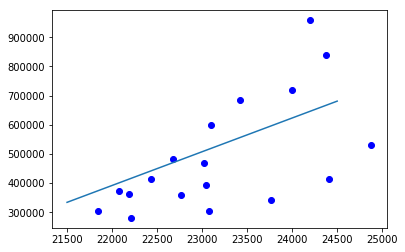

In [184]:
# visualize results for GDP
import matplotlib.pyplot as plt
xtrain = np.array(list(gdp.loc[:, 'Spain'])).astype(np.float64).reshape(-1, 1)
ytrain = np.array(list(migr.loc[:, 'Spain'])).astype(np.float64).reshape(-1, 1)

for i in range(len(xtrain)):
    plt.plot(xtrain[i], ytrain[i], 'bo')

x = np.linspace(21500,24500,100)
y = 115.62161740132223 * x -2151692.8492117184

plt.plot(x, y)

plt.show()

# File generator

In [185]:
coords = [
[22, 13],
[22, 10],
[36, 1],
[22, 16],
[18, 23],
[30, 27],
[31, 33],
[12, 12],
[18, 18],
[27, 5],
[26, 13],
[4, 20],
[19, 10],
[30, 25],
[29, 22],
[15, 16],
[22, 2],
[15, 19],
[18, 32],
[25, 19],
[4, 5],
[25, 15],
[22, 12],
[8, 6],
[22, 31],
[9, 19]]

In [186]:
all = pd.DataFrame(coords, columns = ['x', 'y']) 
all['country'] = countries
all

,x,y,country
0,22,13,Austria
1,22,10,Croatia
2,36,1,Cyprus
3,22,16,Czechia
4,18,23,Denmark
5,30,27,Estonia
6,31,33,Finland
7,12,12,France
8,18,18,Germany
9,27,5,Greece


In [187]:
population = pd.read_csv('population_2011.csv')
population.columns = ['Country', 'total', 'prct']
population = delete_countries(population, deleted_countries)
population.sort_values('Country', inplace=True)
population = population.reset_index(drop=True)
all['population'] = population['total']
all

,x,y,country,population
0,22,13,Austria,8401940
1,22,10,Croatia,4284889
2,36,1,Cyprus,840407
3,22,16,Czechia,10436560
4,18,23,Denmark,5560628
5,30,27,Estonia,1294455
6,31,33,Finland,5375276
7,12,12,France,64933400
8,18,18,Germany,80219695
9,27,5,Greece,10816286


In [188]:
all['gdp'] = list(gdp.loc['2001'])
all

,x,y,country,population,gdp
0,22,13,Austria,8401940,31990
1,22,10,Croatia,4284889,8480
2,36,1,Cyprus,840407,20700
3,22,16,Czechia,10436560,11540
4,18,23,Denmark,5560628,42390
5,30,27,Estonia,1294455,8070
6,31,33,Finland,5375276,31230
7,12,12,France,64933400,29290
8,18,18,Germany,80219695,29370
9,27,5,Greece,10816286,18210


In [189]:
all['unemployment'] = list(unempl.loc['2001'])
all

,x,y,country,population,gdp,unemployment
0,22,13,Austria,8401940,31990,4.0
1,22,10,Croatia,4284889,8480,16.0
2,36,1,Cyprus,840407,20700,3.9
3,22,16,Czechia,10436560,11540,8.1
4,18,23,Denmark,5560628,42390,4.5
5,30,27,Estonia,1294455,8070,13.0
6,31,33,Finland,5375276,31230,9.1
7,12,12,France,64933400,29290,7.8
8,18,18,Germany,80219695,29370,7.8
9,27,5,Greece,10816286,18210,10.7


In [193]:
all['a_gdp'] = a_gdp
all['b_gdp'] = b_gdp
all['a_unemployment'] = a_unempl
all['b_unemployment'] = b_unempl
all

,x,y,country,population,gdp,unemployment,a_gdp,b_gdp,a_unemployment,b_unemployment
0,22,13,Austria,8401940,31990,4.0,0.00929,34248.6,0.0000161,3.5
1,22,10,Croatia,4284889,8480,16.0,-0.03006,10864.7,-0.0002058,16.1
2,36,1,Cyprus,840407,20700,3.9,0.07028,21372.0,0.0001079,6.4
3,22,16,Czechia,10436560,11540,8.1,0.01299,14021.7,-0.0000105,6.7
4,18,23,Denmark,5560628,42390,4.5,0.14165,36476.6,-0.0000109,6.4
5,30,27,Estonia,1294455,8070,13.0,0.26112,10694.0,-0.0002540,10.1
6,31,33,Finland,5375276,31230,9.1,0.17200,30295.0,-0.0000196,8.8
7,12,12,France,64933400,29290,7.8,0.01745,25207.5,0.0000127,4.9
8,18,18,Germany,80219695,29370,7.8,0.00179,30778.5,-0.0000021,8.6
9,27,5,Greece,10816286,18210,10.7,-0.02319,20963.3,-0.0000329,18.2


In [197]:
all.to_csv('new_results.tsv', sep='\t', header=False, index=False)